In [1]:
import librosa
from colorsys import rgb_to_hsv, hsv_to_rgb
import music21 as mu
from midi2audio import FluidSynth
import pandas as pd
import numpy as np
import sympy as sp
from IPython.display import HTML, IFrame
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Rectangle
from IPython.display import Image
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import itables as it
from itables import init_notebook_mode

#init_notebook_mode(all_interactive=True)

# update music21 environment so it can find MuseScore
mu.environment.set('musescoreDirectPNGPath', '/usr/bin/musescore')


import ScoreProcessingFunctions as spf



Let's start be importing some data and we will look at Mahlors first sympony

In [2]:
# get hold of some data
M1 = mu.converter.parse("./MidiAndMusicXMLFiles/MahlerSymphonies/symphony1/MusicXML/1st-movement-Langsam-Schleppend-Immer-sehr-gemachlich.mxl")
M2 = mu.converter.parse("./MidiAndMusicXMLFiles/MahlerSymphonies/symphony1/MusicXML/2nd-movement-Kraftig-bewegt.mxl")
M3 = mu.converter.parse("./MidiAndMusicXMLFiles/MahlerSymphonies/symphony1/MusicXML/3rd-movement-Feierlich-und-gemessen-ohne-zu-schleppend.mxl")
M4 = mu.converter.parse("./MidiAndMusicXMLFiles/MahlerSymphonies/symphony1/MusicXML/4th-movement-Sturmisch-bewegt.mxl")


This is now a music21 object and there are a number of things. INstead let's take a different approach, and convert these into a data frame

In [17]:
# mahlerS1M1.measures(1, 2).show('text')

In [3]:
M1Data = spf.convertScoreToDF(M1, "MahlerSym1", 1)
M2Data = spf.convertScoreToDF(M2, "MahlerSym1", 2)
M3Data = spf.convertScoreToDF(M3, "MahlerSym1", 3)
M4Data = spf.convertScoreToDF(M4, "MahlerSym1", 4)

In [6]:
M1Data.head()

,offset,quarterLengthDuration,measureNumber,currentNumerator,currentDenominator,instrument,part,nameWithOctave,midiNumber,fullName,name,octave,offsetAsFloat,quarterLengthDurationAsFloat,partColor,scoreName,movement
0,0.0,4.0,1,4,4,Flute,"Flute, Fl�ten I II III IV",NA,-1,Rest,NA,NA,0.0,4.0,"[0.267004, 0.004874, 0.329415, 1.0]",MahlerSym1,1
1,4.0,4.0,2,4,4,Flute,"Flute, Fl�ten I II III IV",NA,-1,Rest,NA,NA,4.0,4.0,"[0.267004, 0.004874, 0.329415, 1.0]",MahlerSym1,1
2,8.0,4.0,3,4,4,Flute,"Flute, Fl�ten I II III IV",NA,-1,Rest,NA,NA,8.0,4.0,"[0.267004, 0.004874, 0.329415, 1.0]",MahlerSym1,1
3,12.0,4.0,4,4,4,Flute,"Flute, Fl�ten I II III IV",NA,-1,Rest,NA,NA,12.0,4.0,"[0.267004, 0.004874, 0.329415, 1.0]",MahlerSym1,1
4,16.0,4.0,5,4,4,Flute,"Flute, Fl�ten I II III IV",NA,-1,Rest,NA,NA,16.0,4.0,"[0.267004, 0.004874, 0.329415, 1.0]",MahlerSym1,1


also possible to visualise this, start somewhere arbitrary and look at bars 100 through 102

In [59]:
it.show(M4Data.head(5), column_filters="header", dom="lrtip", maxBytes=0)

Loading... (need help?)


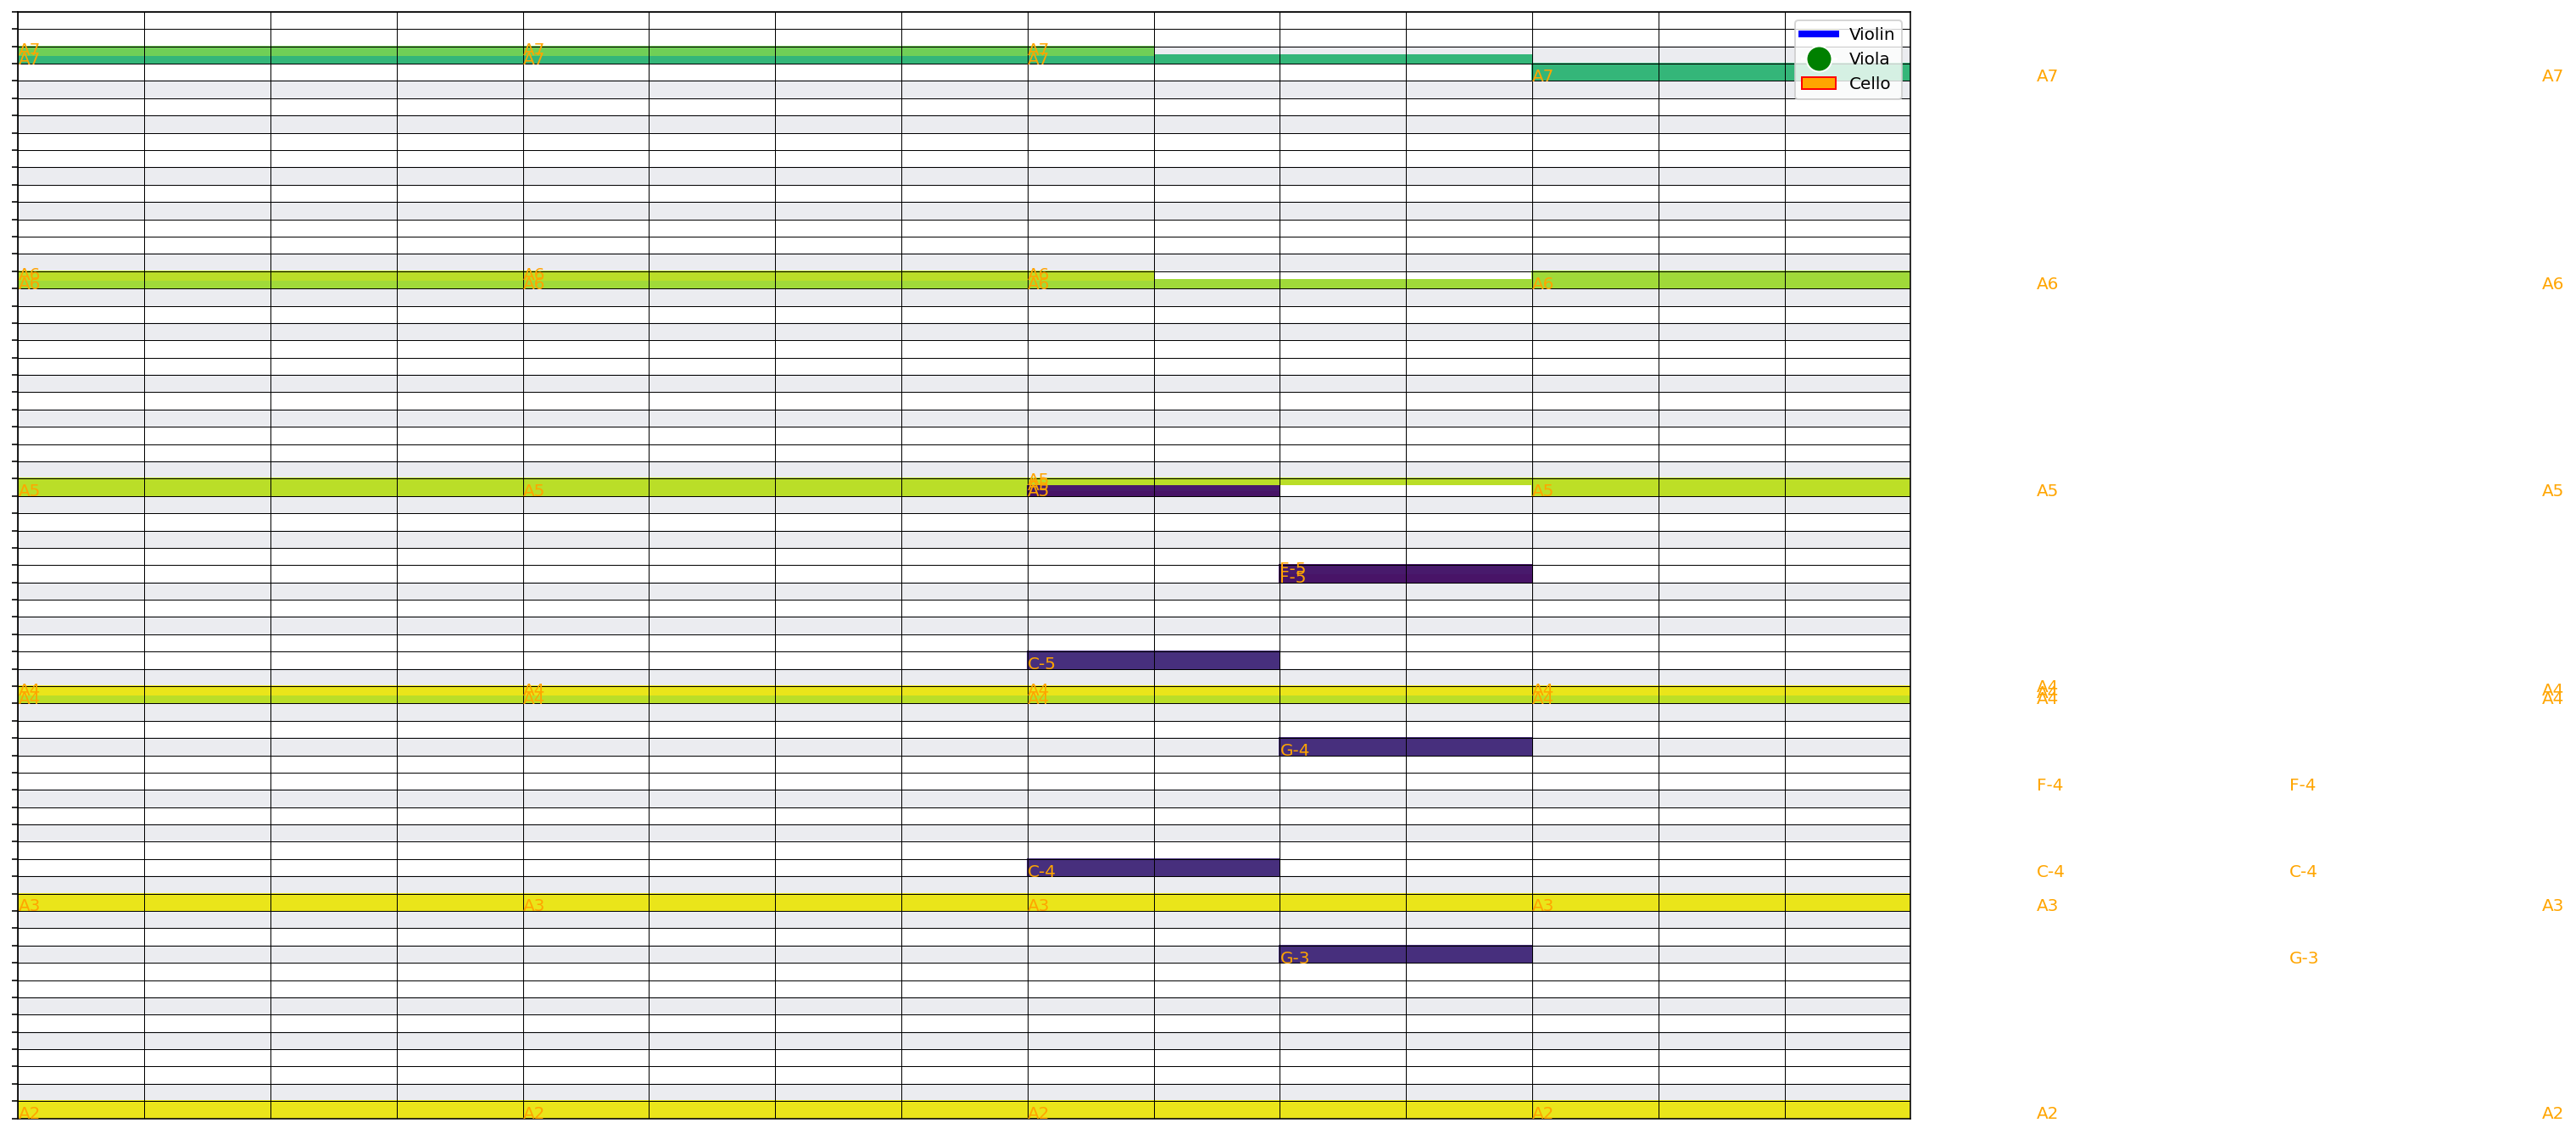

In [99]:
spf.visualizeScore(M1Data, 1, 7)

And also play the example by converting to a midi file and MP3

In [16]:
M4Data.columns

Index(['offset', 'quarterLengthDuration', 'measureNumber', 'currentNumerator',
       'currentDenominator', 'instrument', 'part', 'nameWithOctave',
       'midiNumber', 'fullName', 'name', 'octave', 'offsetAsFloat',
       'quarterLengthDurationAsFloat', 'partColor', 'scoreName', 'movement'],
      dtype='object')

In [8]:
#mahlerS1M4Data[mahlerS1M4Data.midiNumber != -1].groupby(['measureNumber', 'instrument']).sum().reset_index().head(20)
M1Data[ (M1Data.midiNumber != -1)  & (M1Data.measureNumber >= 2) & (M1Data.measureNumber <= 2)].instrument.unique()

array(['Strings', 'Contrabasses'], dtype=object)

[]

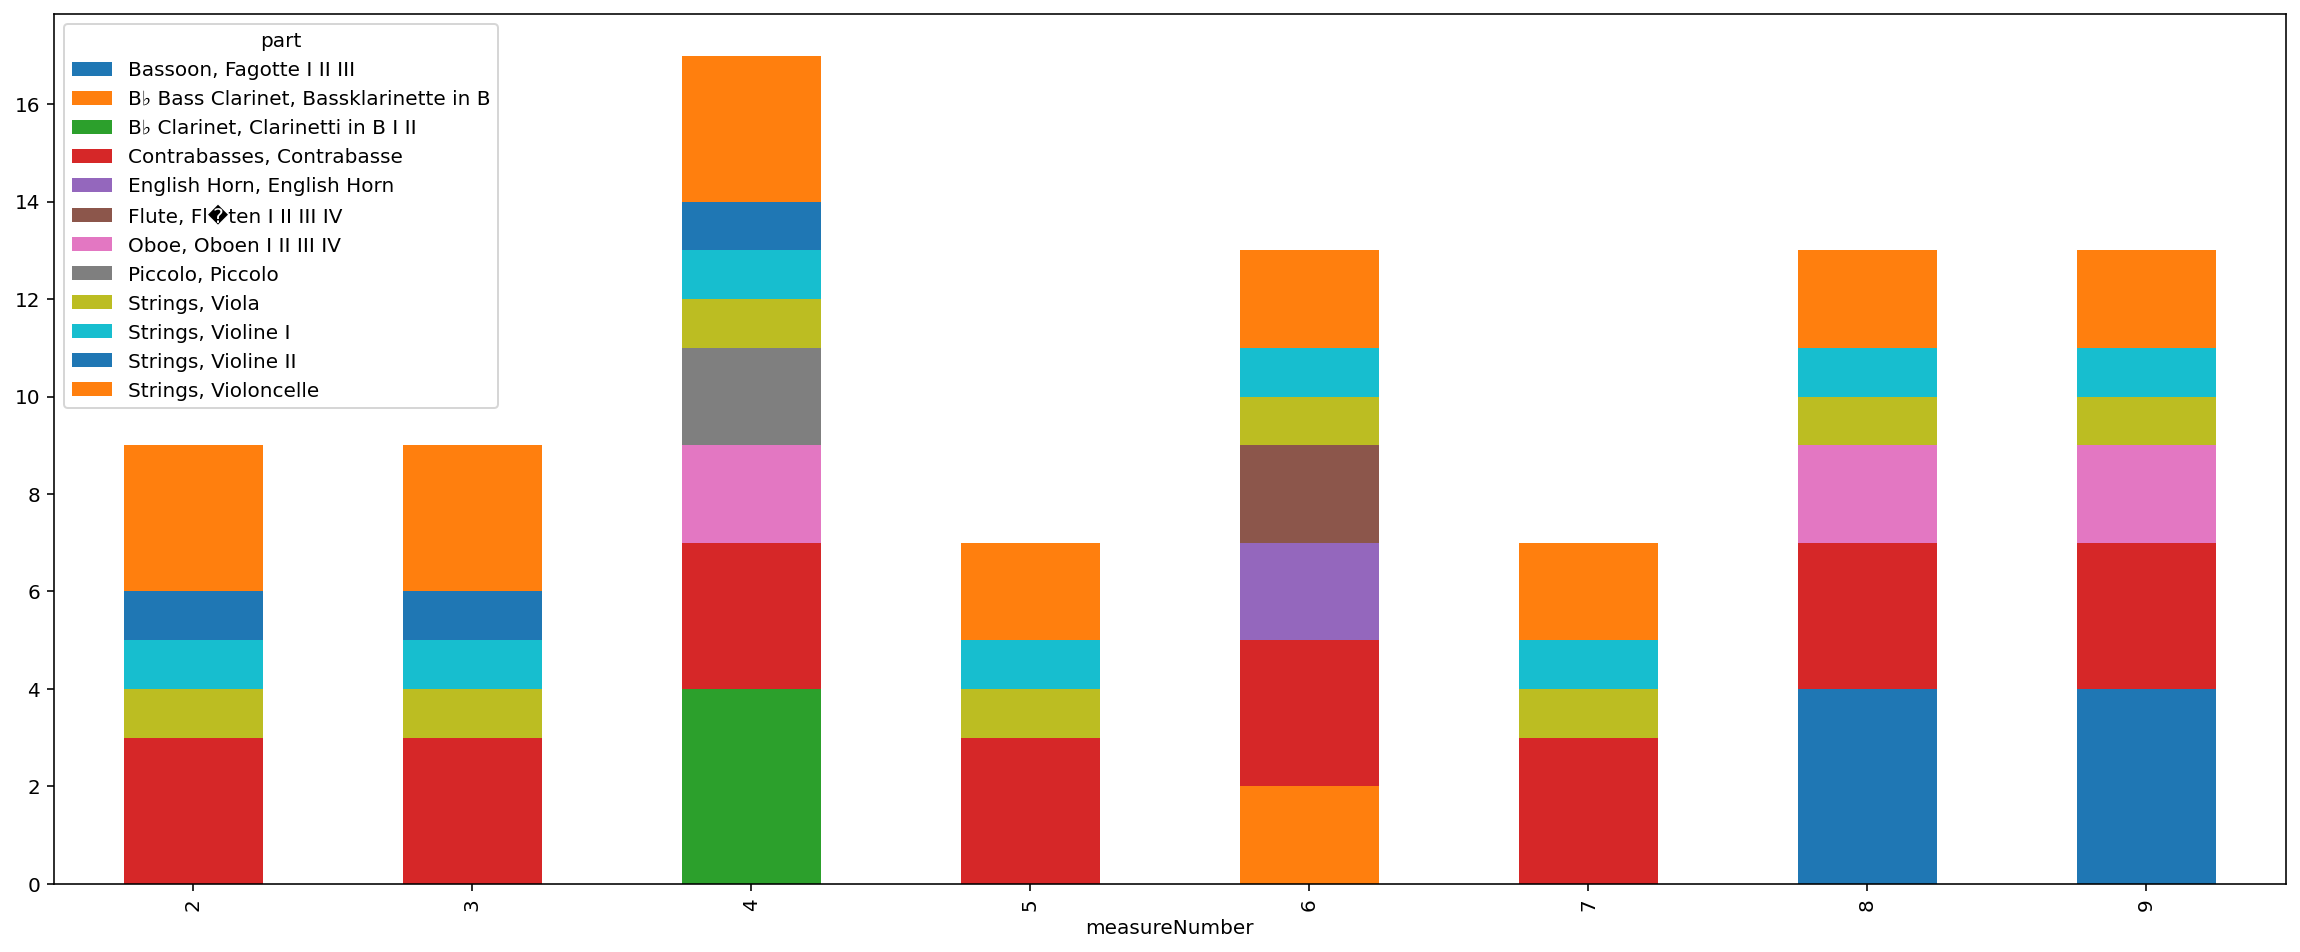

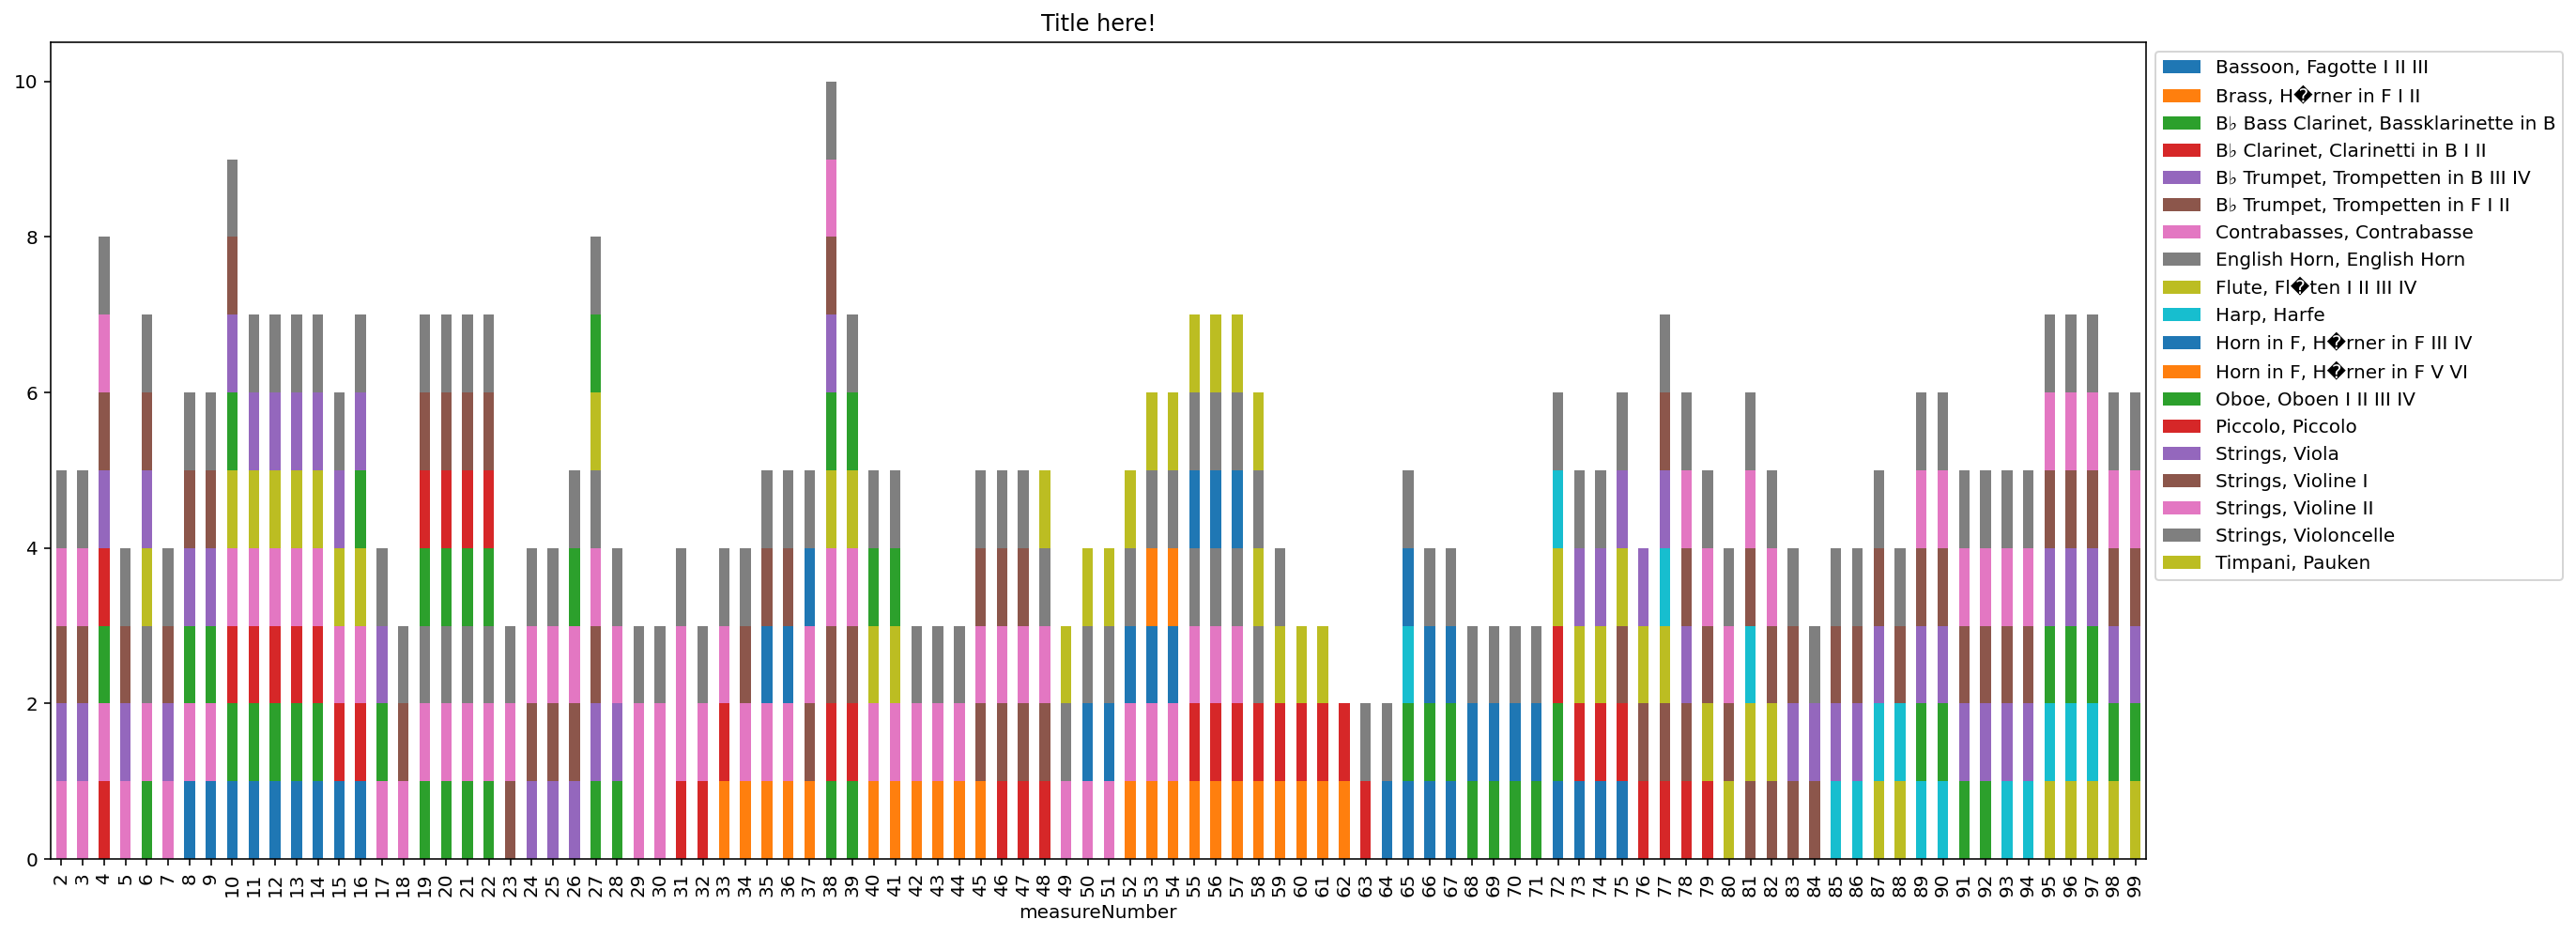

In [100]:
x = M1Data[(M1Data.midiNumber != -1) & (M1Data.measureNumber < 10)]

ax1 = x.groupby(['measureNumber','part']).size().unstack().plot(kind='bar',stacked=True, figsize=(20, 8))
ax1 = z.plot(kind='bar',stacked=True, figsize=(20, 8))
ax1.set_title("Title here!",color='black')
ax1.legend(bbox_to_anchor=(1.0, 1.0))
ax1.plot()


In [85]:
z = x.groupby(['measureNumber','part']).size().unstack()

In [86]:
z[~z.isnull()] = 1 

[]

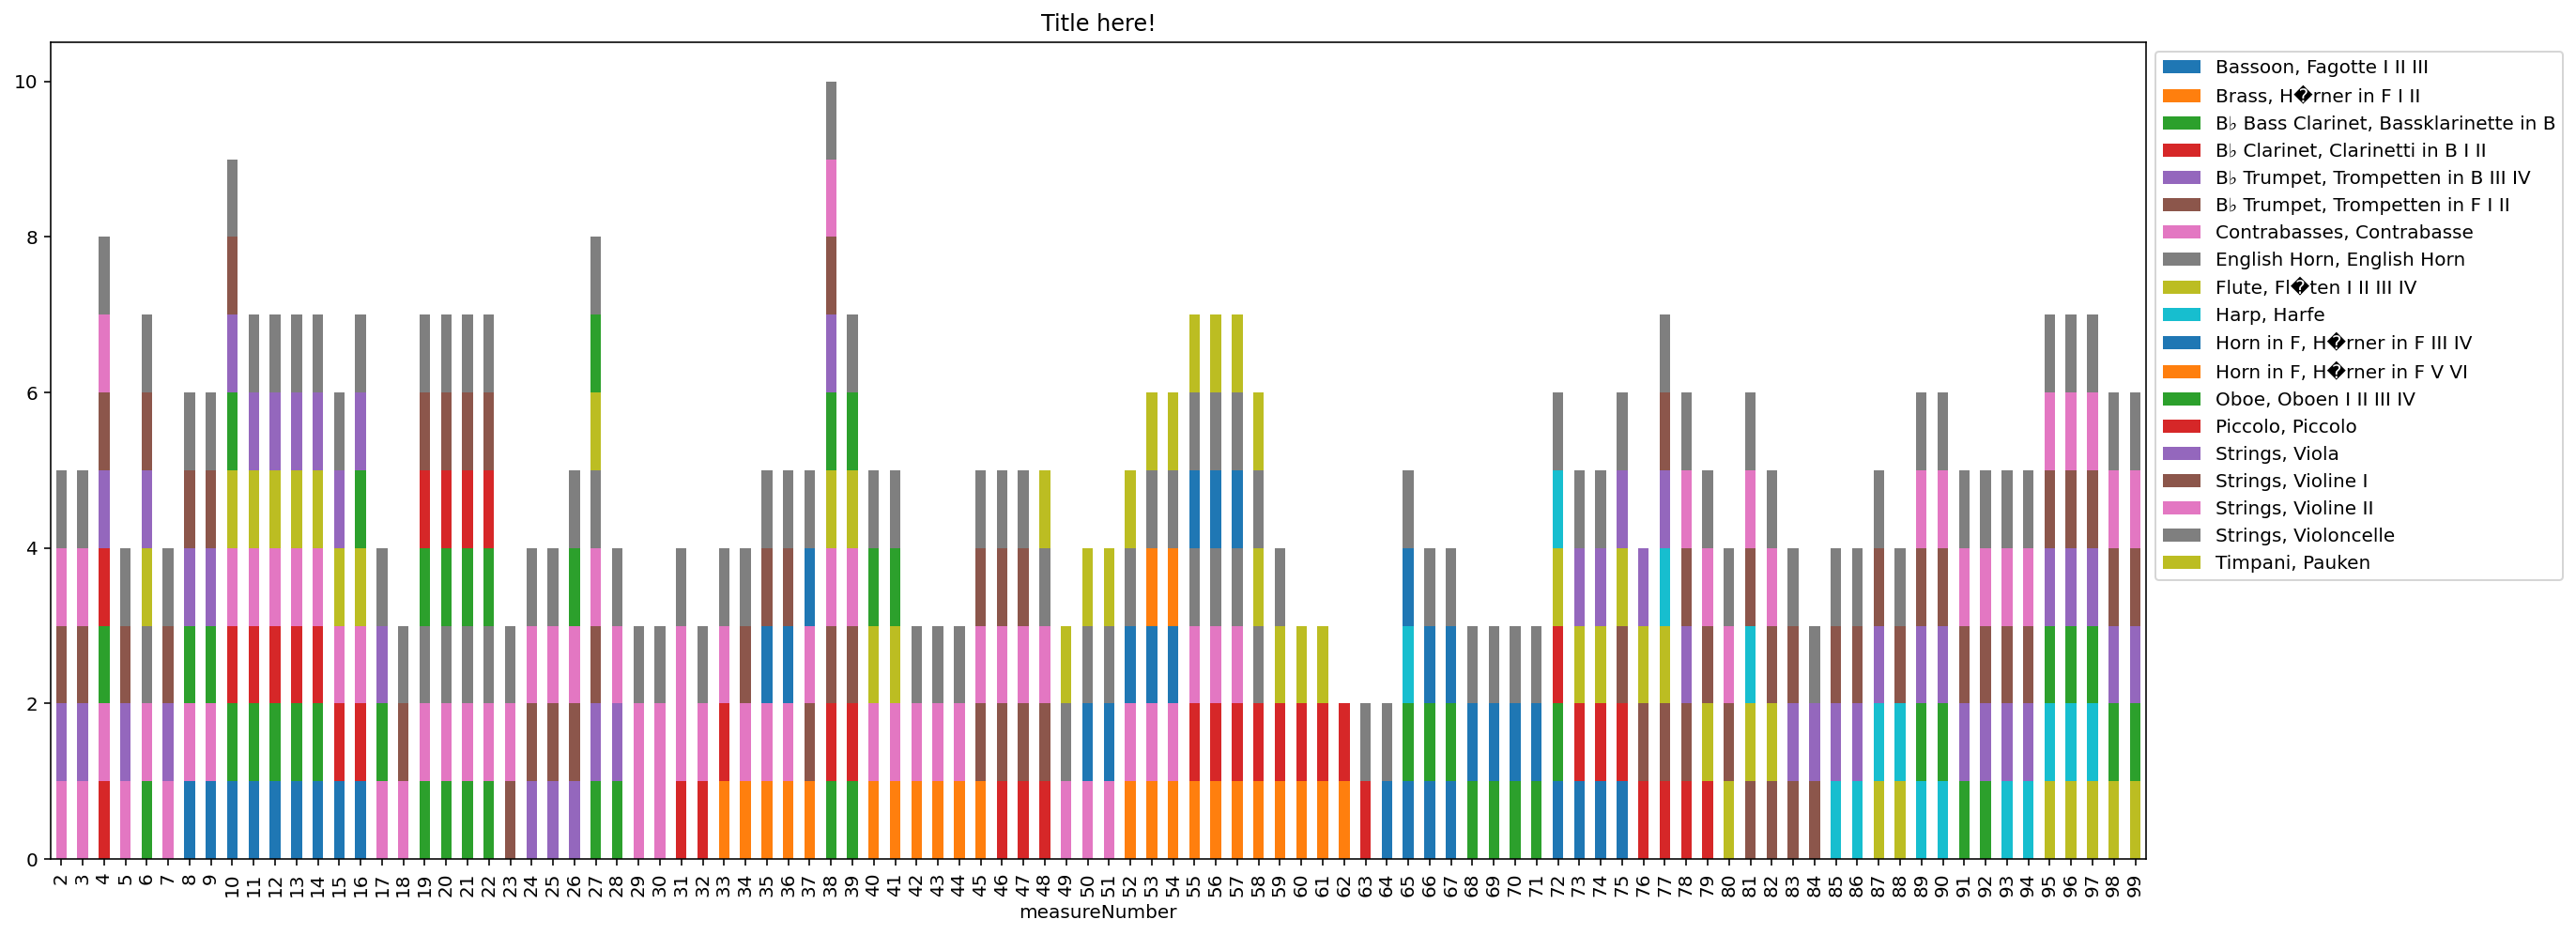

In [93]:

ax = z.plot(kind='bar',stacked=True, figsize=(20, 8))
ax.set_title("Title here!",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [ ]:
ax = df.plot.bar()
ax.set_title("Title here!",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [88]:
 M1Data[(M1Data.midiNumber != -1) & (M1Data.measureNumber >= 67)& (M1Data.measureNumber < 71)]

,offset,quarterLengthDuration,measureNumber,currentNumerator,currentDenominator,instrument,part,nameWithOctave,midiNumber,fullName,name,octave,offsetAsFloat,quarterLengthDurationAsFloat,partColor,scoreName,movement
9520,264.0,2.0,67,2,2,B♭ Bass Clarinet,"B♭ Bass Clarinet, Bassklarinette in B",E-4,63,E-flat in octave 4,E-,4,264.0,2.0,"[0.239346, 0.300855, 0.540844, 1.0]",MahlerSym1,1
9521,266.0,1.0,67,2,2,B♭ Bass Clarinet,"B♭ Bass Clarinet, Bassklarinette in B",D-4,61,D-flat in octave 4,D-,4,266.0,1.0,"[0.239346, 0.300855, 0.540844, 1.0]",MahlerSym1,1
9522,267.0,1.0,67,2,2,B♭ Bass Clarinet,"B♭ Bass Clarinet, Bassklarinette in B",C-4,59,C-flat in octave 4,C-,4,267.0,1.0,"[0.239346, 0.300855, 0.540844, 1.0]",MahlerSym1,1
9523,268.0,2.0,68,2,2,B♭ Bass Clarinet,"B♭ Bass Clarinet, Bassklarinette in B",D-4,61,D-flat in octave 4,D-,4,268.0,2.0,"[0.239346, 0.300855, 0.540844, 1.0]",MahlerSym1,1
9524,270.0,2.0,68,2,2,B♭ Bass Clarinet,"B♭ Bass Clarinet, Bassklarinette in B",E-4,63,E-flat in octave 4,E-,4,270.0,2.0,"[0.239346, 0.300855, 0.540844, 1.0]",MahlerSym1,1
9525,272.0,2.0,69,2,2,B♭ Bass Clarinet,"B♭ Bass Clarinet, Bassklarinette in B",F-4,64,F-flat in octave 4,F-,4,272.0,2.0,"[0.239346, 0.300855, 0.540844, 1.0]",MahlerSym1,1
9526,274.0,1.0,69,2,2,B♭ Bass Clarinet,"B♭ Bass Clarinet, Bassklarinette in B",G-4,66,G-flat in octave 4,G-,4,274.0,1.0,"[0.239346, 0.300855, 0.540844, 1.0]",MahlerSym1,1
9527,275.0,1.0,69,2,2,B♭ Bass Clarinet,"B♭ Bass Clarinet, Bassklarinette in B",E-4,63,E-flat in octave 4,E-,4,275.0,1.0,"[0.239346, 0.300855, 0.540844, 1.0]",MahlerSym1,1
9528,276.0,2.0,70,2,2,B♭ Bass Clarinet,"B♭ Bass Clarinet, Bassklarinette in B",A-4,68,A-flat in octave 4,A-,4,276.0,2.0,"[0.239346, 0.300855, 0.540844, 1.0]",MahlerSym1,1
9529,278.0,1.0,70,2,2,B♭ Bass Clarinet,"B♭ Bass Clarinet, Bassklarinette in B",A4,69,A-natural in octave 4,A,4,278.0,1.0,"[0.239346, 0.300855, 0.540844, 1.0]",MahlerSym1,1


In [98]:
# find instruments that are present

# find clusters of instruments - break into 16 bar groups, what instruments are playing

# on a given beat what instruments are playing - how are chords voiced - voicing instruments for orchestra

# then specific excample
#x.groupby(['measureNumber','part']).size().unstack()

1. Explore openings of different symphonies
2. Use bars 48 through 59 to explore timpani
3. Examine unison strings examples